In [1]:
# if local use new_torch_env

import os

import numpy as np
import pandas as pd
# import seaborn as sns

from collections import Counter

import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from xml.etree import ElementTree, ElementInclude

import pickle
from functools import reduce

import iptcinfo3
from iptcinfo3 import IPTCInfo

import detectron2

from utills_output import *

In [2]:
def open_df(full = False, threshold = 0.3):
    
    path = '/home/simon/Documents/Bodies/data/OD_dataframes'

    if full == True:
        df_name = f'OD_DF_FULL_t{int(threshold*100)}.pkl'

    elif full == False:
        df_name = f'OD_DF_annotated_t{int(threshold*100)}.pkl'

    print(f'loading: {df_name}')

    df_path = os.path.join(path, df_name)

    with open(df_path, 'rb') as file:
        df = pickle.load(file)

    return(df)

In [11]:
df_dict = {}
t_range = np.arange(0.1, 0.8, 0.05)

for t in t_range:
    df_name = f'df_t{int(t*100)}'
    df_dict[df_name] = open_df(False, t)
    print(f'Done w/ {df_name}')
    # debug...
    # print(df_dict[df_name]['firearm_mean'].mean())

loading: OD_DF_annotated_t10.pkl
Done w/ df_t10
loading: OD_DF_annotated_t15.pkl
Done w/ df_t15
loading: OD_DF_annotated_t20.pkl
Done w/ df_t20
loading: OD_DF_annotated_t25.pkl
Done w/ df_t25
loading: OD_DF_annotated_t30.pkl
Done w/ df_t30
loading: OD_DF_annotated_t35.pkl
Done w/ df_t35
loading: OD_DF_annotated_t40.pkl
Done w/ df_t40
loading: OD_DF_annotated_t45.pkl
Done w/ df_t45
loading: OD_DF_annotated_t50.pkl
Done w/ df_t50
loading: OD_DF_annotated_t55.pkl
Done w/ df_t55
loading: OD_DF_annotated_t60.pkl
Done w/ df_t60
loading: OD_DF_annotated_t65.pkl
Done w/ df_t65
loading: OD_DF_annotated_t70.pkl
Done w/ df_t70
loading: OD_DF_annotated_t75.pkl
Done w/ df_t75


In [67]:
for df_name in df_dict.keys():

    print(df_name)

    df = df_dict[df_name]

    for feature in df.columns:
        if 'mean' in feature: # no meta features have this.
            feature_mean = feature
            feature_annotated = f'{feature.split("_")[0]}_annotated'

            corr = np.corrcoef(df[feature_mean], df[feature_annotated])[0,1]

            if corr > 0.3:
                print(f'{feature_mean.split("_")[0]}: {corr:.3}')
    print('\n')

df_t10
falgIRQ: 0.729
youth: 0.382
male: 0.803
flagUS: 0.745
militaryVehicle: 0.805
person: 0.827
firearm: 0.809
adult: 0.713
uniformed: 0.774
female: 0.336
child: 0.338


df_t15
child: 0.322
firearm: 0.86
person: 0.852
falgIRQ: 0.778
youth: 0.43
militaryVehicle: 0.822
flagUS: 0.766
male: 0.818
adult: 0.722
female: 0.333
bloodedArea: 0.309
religiousGarmentFemale: 0.33
uniformed: 0.794


df_t20
uniformed: 0.821
casualty: 0.309
firearm: 0.885
falgIRQ: 0.801
adult: 0.736
bloodedArea: 0.319
militaryVehicle: 0.848
youth: 0.406
person: 0.868
female: 0.366
flagUS: 0.759
male: 0.83
religiousGarmentFemale: 0.341


df_t25
militaryVehicle: 0.872
adult: 0.677
youth: 0.338
flagUS: 0.77
male: 0.821
religiousGarmentFemale: 0.341
person: 0.882
female: 0.34
firearm: 0.902
uniformed: 0.839
falgIRQ: 0.829
bloodedArea: 0.363
casualty: 0.355


df_t30
person: 0.882
uniformed: 0.826
flagUS: 0.808
firearm: 0.898
militaryVehicle: 0.895
male: 0.755
falgIRQ: 0.854
adult: 0.484
casualty: 0.418
bloodedArea: 0.432


In [81]:
for df_name in df_dict.keys():

    print(df_name)

    df = df_dict[df_name]

    for feature in df.columns:
        # mean, median, retinaR50, fasterR50
        if 'retinaR101' in feature: # no meta features have this.
            feature_model = feature
            feature_annotated = f'{feature.split("_")[0]}_annotated'

            corr = np.corrcoef(df[feature_model], df[feature_annotated])[0,1]

            if corr < 0.3:
                print(f'{feature_model.split("_")[0]}: {corr:.3}')
    print('\n')

df_t10
infant: -0.00951
hostage: 0.178
bloodedArea: 0.13
casualty: 0.246
religiousGarmentFemale: 0.285
elderly: 0.0857
prayerInformal: -0.00315
prayerSalah: -0.0079


df_t15
casualty: 0.253
bloodedArea: 0.222
elderly: 0.0479
infant: -0.00447
prayerInformal: -0.00141
prayerSalah: -0.00352
hostage: 0.222


df_t20
hostage: 0.173
bloodedArea: 0.212
elderly: 0.0297
infant: -0.00316
child: 0.296
prayerSalah: -0.00117


df_t25
child: 0.154
youth: 0.225
hostage: -0.0158
bloodedArea: 0.134
elderly: -0.0249


df_t30
hostage: -0.00877
bloodedArea: 0.0858
female: 0.183
elderly: -0.0143
religiousGarmentFemale: 0.238
child: 0.128
youth: 0.121


df_t35
bloodedArea: 0.153
female: 0.148
religiousGarmentFemale: 0.176
elderly: -0.00638
child: 0.0286
adult: 0.118
youth: 0.0578
hostage: -0.00554


df_t40
religiousGarmentFemale: 0.103
adult: 0.0633
youth: 0.11
female: 0.0831
child: -0.0107


df_t45
male: 0.281
adult: 0.0325
female: 0.0248


df_t50
casualty: 0.145
male: 0.132
adult: 0.00287


df_t55
adult: 0

# WE ARE GOOD AT:
- firearms
- persons (adult and male as a function here of..)
- militaryVehicle
- uniformed
- flagUS
- falgIRQ

# We are less good at (but maybe it can be done..)
- child
- female
- religiousGarmentFemale
- casualty

# We are really bad at
- infant
- hostage
- blooded Area
- elderly
- prayer (Informal)
- prayer (Salah)


In [ ]:
# t = 0.3
# df_name = f'df_t{int(t*100)}'
# plot_corr(df_dict[df_name])

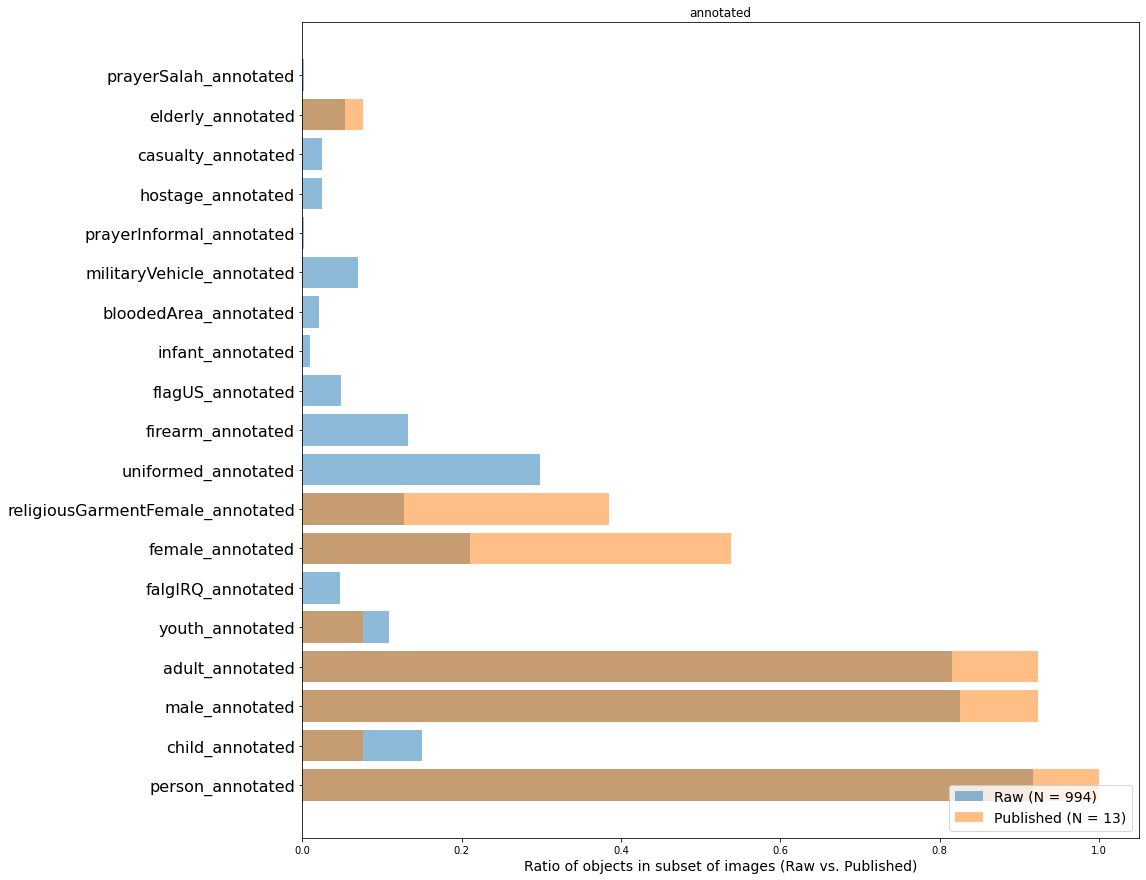

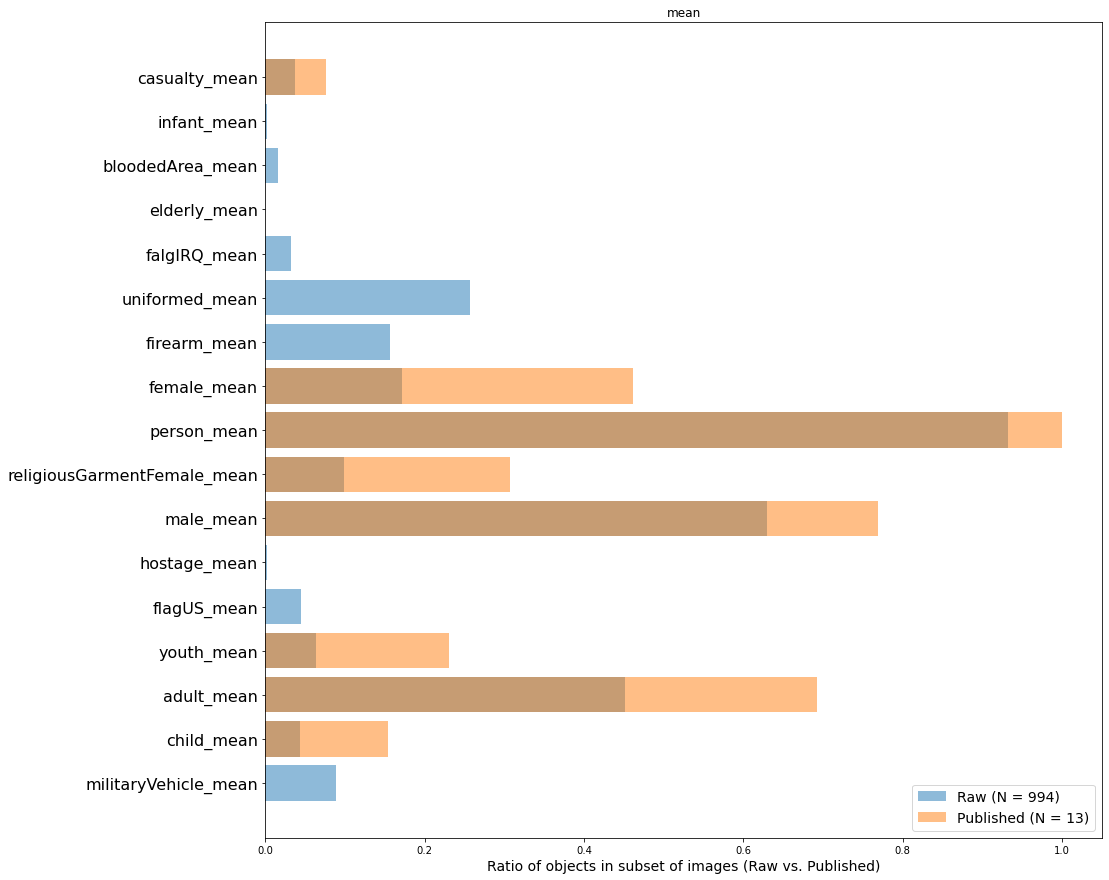

In [80]:
t = 0.25
t = 0.5

df_name = f'df_t{int(t*100)}'
df = df_dict[df_name]

# feature_version_list = ['annotated', 'mean', 'median', 'fasterX101', 'fasterR101', 'fasterR50', 'retinaR101', 'retinaR50']
feature_version_list = ['annotated', 'mean']

for i in feature_version_list:
    feature_dist_plots(df, i)

# FULL

In [13]:
df_dict = {}
t_range = np.arange(0.1, 0.55, 0.05)

for t in t_range:
    df_name = f'df_t{int(t*100)}'
    df_dict[df_name] = open_df(True, t)
    print(f'Done w/ {df_name}')
    # debug...
    # print(df_dict[df_name]['firearm_mean'].mean())

loading: OD_DF_FULL_t10.pkl
Done w/ df_t10
loading: OD_DF_FULL_t15.pkl
Done w/ df_t15
loading: OD_DF_FULL_t20.pkl
Done w/ df_t20
loading: OD_DF_FULL_t25.pkl
Done w/ df_t25
loading: OD_DF_FULL_t30.pkl
Done w/ df_t30
loading: OD_DF_FULL_t35.pkl
Done w/ df_t35
loading: OD_DF_FULL_t40.pkl
Done w/ df_t40
loading: OD_DF_FULL_t45.pkl
Done w/ df_t45
loading: OD_DF_FULL_t50.pkl
Done w/ df_t50


In [12]:
for key in df_dict.keys():

    print(key)
    print(df_dict[key]['firearm_mean'].mean())

df_t10
1.2861966236345619
df_t15
0.7968222442899702
df_t20
0.5684210526315779
df_t25
0.43376365441906567
df_t30
0.35729890764647404
df_t35
0.3012909632571992
df_t40
0.264349553128103
df_t45
0.23793445878848046
df_t50
0.21688182720953322
df_t55
0.19821251241310822
df_t60
0.17974180734856007
df_t65
0.15809334657398214
df_t70
0.1410129096325721
df_t75
0.12313803376365451


In [6]:
df_dict['df_t10'].sample(10)

,img_id,falgIRQ_fasterR50,child_fasterR50,adult_fasterR50,male_fasterR50,female_fasterR50,firearm_fasterR50,person_fasterR50,religiousGarmentFemale_fasterR50,uniformed_fasterR50,...,custom7,custom8,custom9,custom10,custom11,custom12,custom15,custom16,custom19,custom20
121523,JS147823,0,0,3,3,0,2,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76420,JS11629,0,0,1,1,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62723,JS85370,0,0,4,4,1,0,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43847,JS86824,0,0,0,0,0,3,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89438,JS7637,0,0,4,3,0,2,5,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75641,JS144767,0,0,0,0,0,0,1,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42855,JS82224,0,0,1,1,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30672,JS114614,0,0,8,9,0,4,11,0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142662,JS130551,0,0,3,4,0,3,5,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33834,JS90126,0,0,1,1,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.shape

(1007, 151)

In [5]:
#df_sub = df.sample(5000)

plotting child: both. Dim: (1007, 151)


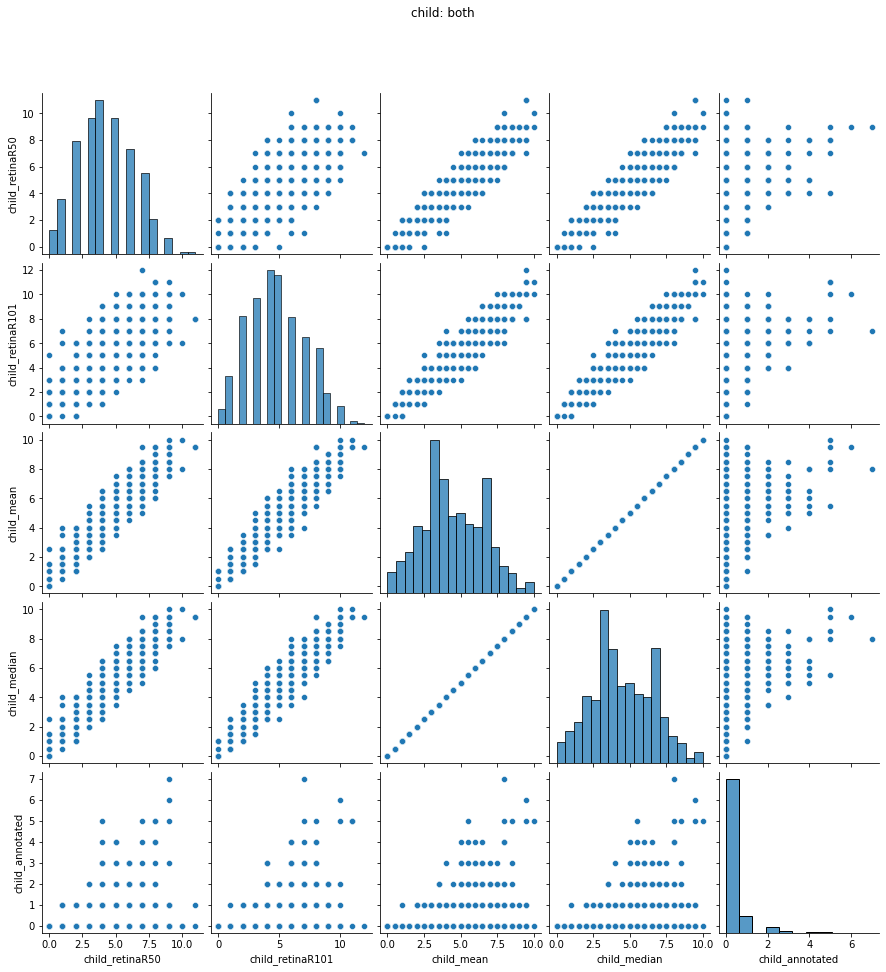

plotting uniformed: both. Dim: (1007, 151)


KeyboardInterrupt: 

In [16]:
plot_corr(df)

In [ ]:
feature_version_list = ['annotated', 'mean', 'median', 'fasterX101', 'fasterR101', 'fasterR50', 'retinaR101', 'retinaR50']
for i in feature_version_list:
    feature_dist_plots(df, i)

# OLD:

# remember: 
All thresholds were set at 0.1 in prediction scripts.  

> cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1  # set a custom testing threshold

If everything is over estimated, lower it. But this you can also do model specific! Seem like it is mostly ratinanet that overestimates.. Number, but on the flip side it is way better at rare objects! As should be expected.
- In theory you shoould be abel to just use the instance object and create a new output_list.pkl and all_img_feature_list wiht a lower threshold for "score"

# testing:

## Important to do:
- Also think about doing the last ratina net also 
- and maybe not including the fasterRCNN in rare cases (or some other rule)
    - Right now stuff gets fucked up when the Faster's esitmate only zeores..


- Ok... the "overestimation" due to threshold is kind of irretating now.. But how to decide on that abitrary number? 
    - actually - you do have the socers savd so you maybe you could just do asomething there?


# FULL
Todo:
- Make sure meta works here
- Explore...


# final:+
The generation of the dfs should be in their own script. Not here.
Make both annotated_df and df as pickles.



# TWO MAIN ISSUES RIGHT NOW:
1) 0.1 threshold is too high for Retina. Can you fix it from you data or do you need to run new models?
2) What should be the critaria for including models for ensamble? Or should they be weigted?
(need to fix 1 beofre I can survey 2...)


In [ ]:
## You should just load the dfs here.
# with open('spanner_annotated_df.pkl', 'wb') as file:
#     pickle.dump(annotated_df, file)

annotated_df = annotate_df()
annotated_df = meta_to_df(annotated_df)

annotated_df.sample(10)

In [ ]:
np.corrcoef(annotated_df['person_fasterR50'], annotated_df['person_annotated'])

In [ ]:
# Plotting

plot_corr(annotated_df)
plot_corr(annotated_df, 'train')
plot_corr(annotated_df, 'test')

feature_version_list = ['annotated', 'mean', 'median', 'fasterX101', 'fasterR101', 'fasterR50', 'retinaR101', 'retinaR50']
for i in feature_version_list:
    feature_dist_plots(annotated_df, i)

# Annotated, alt threshold (0.3):

In [ ]:
# try w/ alt threshold:
annotated_df_t30 = annotate_df(alt_threshold= True)
annotated_df_t30 = meta_to_df(annotated_df_t30)

annotated_df_t30.sample(10)

In [ ]:
annotated_df_t30['img_id'].head() == annotated_df['img_id'].head()

In [ ]:
np.corrcoef(annotated_df_t30['person_fasterR50'], annotated_df_t30['person_annotated'])

In [ ]:
plot_corr(annotated_df_t30)
plot_corr(annotated_df_t30, 'train')
plot_corr(annotated_df_t30, 'test')

feature_version_list = ['annotated', 'mean', 'median', 'fasterX101', 'fasterR101', 'fasterR50', 'retinaR101', 'retinaR50']
for i in feature_version_list:
    feature_dist_plots(annotated_df_t30, i)

## Important to do:

- After this you could implement FULL before handling the threshold issue described below..
- Also think about doing the last ratina net also - and meybe not including the fasterRCNN in rare cats (or some other rule)
    - Right now stuff gets fucked upi when the Faster's esitmate only zeores..

- Ok... the "overestimation" due to threshold is kind of irretating now.. But how to decide on that abitrary number? 
    - actually - you do have the socers savd so you maybe you could just do asomething there?
    Else, look at parameter below and run again.
    > cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1  # set a custom testing threshold in prediction.py....

# FULL

In [ ]:
df = annotate_df(FULL = True)


In [ ]:
df = meta_to_df(df, img_dir='/media/simon/Seagate Expansion Drive/images_spanner')

Aprox 830min or 14hours

In [ ]:
df.shape

In [ ]:
#with open('spanner_full_df.pkl', 'wb') as file:
  #  pickle.dump(df, file)

In [ ]:
df.sample(10)

In [ ]:
df['custom2'].unique()

In [ ]:
n_raw = (df['custom2'] == 'Raw').sum()
n_sub = (df['custom2'] == 'Submitted').sum()
n_pub = (df['custom2'] == 'Published').sum()

for i in [('Raw', n_raw), ('Submitted', n_sub), ('Published', n_pub)]:
    print(f'Number of {i[0]}: {i[1]} \n')

## Test pickle:


In [ ]:

with open('spanner_full_df.pkl', 'rb') as file:
        test_pickle_df = pickle.load(file)

print(test_pickle_df.shape)
print(test_pickle_df['custom2'].unique())

tp_n_raw = (test_pickle_df['custom2'] == 'Raw').sum()
tp_n_sub = (test_pickle_df['custom2'] == 'Submitted').sum()
tp_n_pub = (test_pickle_df['custom2'] == 'Published').sum()

for i in [('Raw', tp_n_raw), ('Submitted', tp_n_sub), ('Published', tp_n_pub)]:
    print(f'Number of {i[0]}: {i[1]} \n')

In [ ]:
test_pickle_df.sample(10)

Seems good.

# Corrolation plots

In [ ]:
sub_df = df.sample(1000) # subset to plot

In [ ]:
plot_corr(sub_df)

# Raw, Sub an Pub

In [ ]:
# you of course do not have meta yet ...
feature_version_list = ['mean', 'median', 'fasterX101', 'fasterR101', 'fasterR50', 'retinaR101', 'retinaR50'] # no annotaated
for i in feature_version_list:
    feature_dist_plots(df, i) # but this is with full df.. Not the subset for scatter plot